In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

iris = load_iris()           # 加载iris数据集
iris_data = iris['data']     # 提取iris数据集中的特征
iris_target = iris['target'] # 提取iris数据集中的标签
iris_feature_names = iris['feature_names'] #提取iris数据集中的特征名称

scale = MinMaxScaler().fit(iris_data) # 对数据集中的特征设定训练规则
iris_dataScale = scale.transform(iris_data) # 应用规则

kmeans = KMeans(n_clusters=3,random_state=123).fit(iris_dataScale) # 构建并训练模型
print('构建的K-Means模型为：\n',kmeans)

构建的K-Means模型为：
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)


In [4]:
result = kmeans.predict([[1.5,1.5,1.5,1.5]])
print('花瓣花萼长度宽度全为1.5的鸢尾花预测类别为：',result[0])

花瓣花萼长度宽度全为1.5的鸢尾花预测类别为： 0


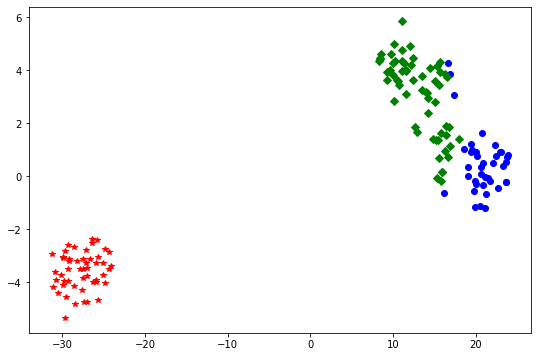

In [6]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 使用TSNE进行数据降维，降成2维
tsne = TSNE(n_components=2,init='random',random_state=177).fit(iris_data)

df = pd.DataFrame(tsne.embedding_) # 将原始数据转换为DataFrame
df['labels'] = kmeans.labels_ # 将聚类结果存储进df数据表

# 提取不同标签的数据
df1 = df[df['labels']==0]
df2 = df[df['labels']==1]
df3 = df[df['labels']==2] 

# 绘制图形
# 绘制画布大小
fig = plt.figure(figsize=(9,6))
# 用不同颜色表示不同数据
plt.plot(df1[0],df1[1],'bo',df2[0],df2[1],'r*',df3[0],df3[1],'gD')
# 保存图片
plt.savefig('tmp/聚类结果.png')
# 展示
plt.show()

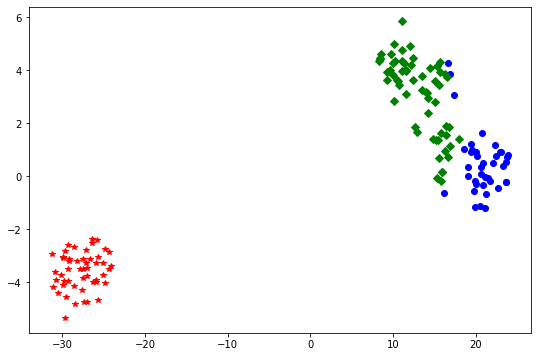

In [9]:
# 代码 6-11
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
##使用TSNE进行数据降维,降成两维
tsne = TSNE(n_components=2,init='random',
    random_state=177).fit(iris_data)
df=pd.DataFrame(tsne.embedding_) ##将原始数据转换为DataFrame
#print(tsne.embedding_)
df['labels'] = kmeans.labels_ ##将聚类结果存储进df数据表
##提取不同标签的数据
df1 = df[df['labels']==0]
df2 = df[df['labels']==1] 
df3 = df[df['labels']==2] 
## 绘制图形
fig = plt.figure(figsize=(9,6)) ##设定空白画布，并制定大小
##用不同的颜色表示不同数据
plt.plot(df1[0],df1[1],'bo',df2[0],df2[1],'r*',
    df3[0],df3[1],'gD')
#plt.savefig('../tmp/聚类结果.png') 
plt.show() ##显示图片